In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import _rebuild
_rebuild()
mpl.rcParams["font.sans-serif"]=[u"SimHei"]
mpl.rcParams["axes.unicode_minus"]=False

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


([<matplotlib.axis.XTick at 0x85d2780>, <matplotlib.axis.XTick at 0x85d20b8>],
 <a list of 2 Text xticklabel objects>)

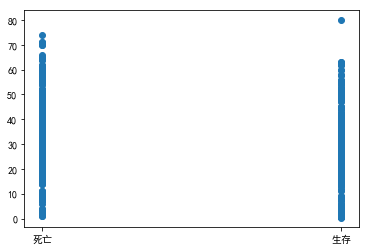

In [6]:
#散点图展示是否生存与年龄的关系
plt.scatter(data.Survived, data.Age)
plt.xticks(np.arange(2),["死亡","生存"])

In [8]:
#同不社会阶层的有多少人，横向柱状图
class_count = data.Pclass.value_counts()

In [9]:
class_count

3    491
1    216
2    184
Name: Pclass, dtype: int64

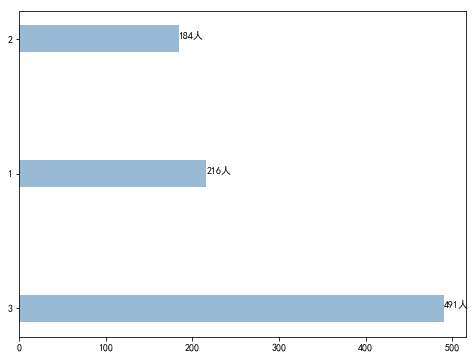

In [13]:
plt.figure(figsize=(8,6))
plt.barh(np.arange(class_count.shape[0]), class_count,color="steelblue", alpha=0.55,height=0.2)
#修改刻度
plt.yticks(np.arange(class_count.shape[0]),class_count.index)
for x,y in zip(np.arange(class_count.shape[0]),class_count):
    plt.text(y,x,str(y)+"人")

In [16]:
#每个港口有多少人登船，纵向柱状图
em_count = data.Embarked.value_counts()

In [17]:
em_count

S    644
C    168
Q     77
Name: Embarked, dtype: int64

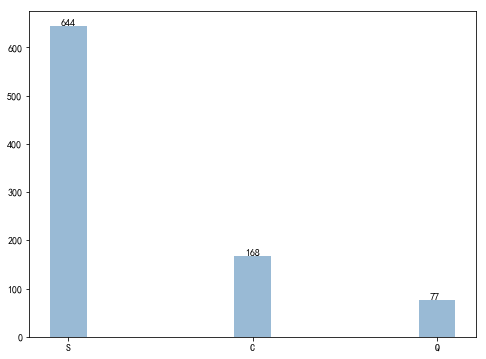

In [24]:
plt.figure(figsize=(8,6))
plt.bar(np.arange(em_count.shape[0]),em_count,color="steelblue",alpha=0.55,width=0.2)
plt.xticks(np.arange(em_count.shape[0]),em_count.index)
for x,y in zip(np.arange(em_count.shape[0]),em_count):
    plt.text(x-0.04,y,y)

In [30]:
#死亡人员的性别分布， 纵向柱状图
#先获取到所有死亡人员的数据
dead_people = data[data["Survived"]==0]

In [31]:
dead_people.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [32]:
#分别查看死亡的男性和女性人数
dead = dead_people.Sex.value_counts()

In [33]:
dead

male      468
female     81
Name: Sex, dtype: int64

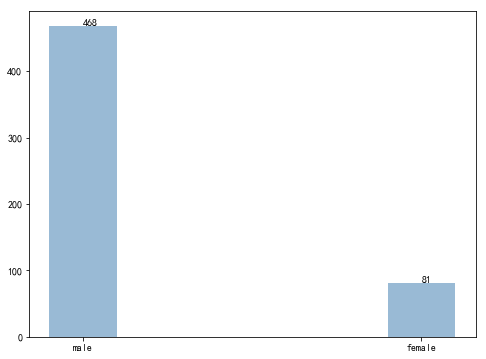

In [36]:
plt.figure(figsize=(8,6))
plt.bar(np.arange(dead.shape[0]),dead,color="steelblue",alpha=0.55,width=0.2)
plt.xticks(np.arange(dead.shape[0]),dead.index)
for x,y in zip(np.arange(dead.shape[0]),dead):
    plt.text(x,y,y)

In [45]:
data = data[~data.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
